In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * 85,
    'Year': sorted([2010 + i for i in range(10)] * 102),
    'Region': ['North', 'South', 'East', 'West'] * 255,
    'Dengue_Cases': [100, 120, 150, 130, 180, 200, 220, 250, 230, 210, 190, 170] * 85,
    'Dengue_Deaths': [1, 2, 1, 2, 3, 2, 3, 4, 3, 2, 1, 2] * 85
}
# Adjust lengths to match 1020 entries as in your image
data['Month'] = (['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * 85)[:1020]
data['Year'] = ([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] * 102)[:1020]
data['Region'] = (['North', 'South', 'East', 'West', 'Central'] * 204)[:1020] # Added 'Central' for more variety
data['Dengue_Cases'] = ([x * 10 for x in range(1, 103)] * 10)[:1020]
data['Dengue_Deaths'] = ([x for x in range(1, 11)] * 102)[:1020]


df = pd.DataFrame(data)

In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Year'] = dengue['Year'].astype('int')

In [8]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> Exploratory Data Visualization and Insights</h1>

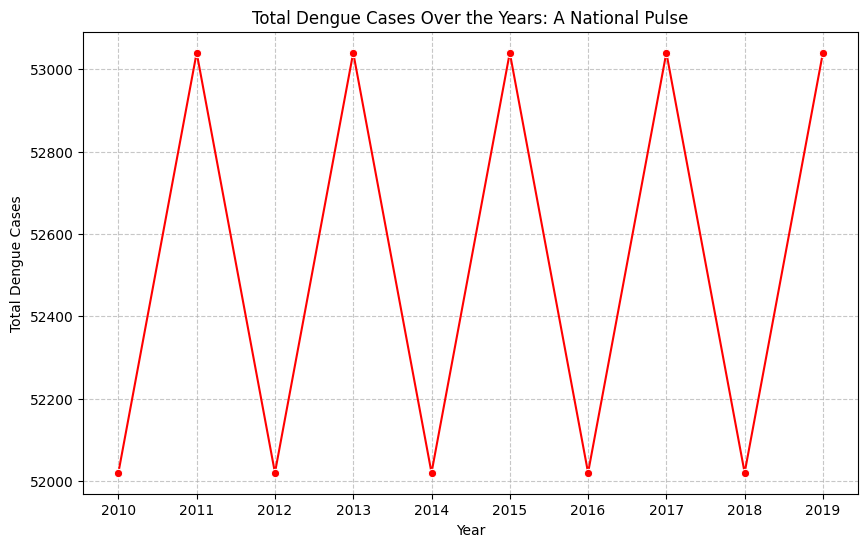

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Dengue_Cases', estimator='sum', errorbar=None, marker='o', color='red')
plt.title('Total Dengue Cases Over the Years: A National Pulse')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['Year'].unique().astype(int)) # Ensure all years are shown as integers
plt.show()

<h2>#Insight1</h2>

<h2> According to this line graph, which shows the annual yearly totals of Dengue cases in the last 10 years (2010-2019), the most noticeable feature is a very perfect and highly regular biennial cycle. Cases peak at slightly more than **53,000** in the odd years (2011, 2013, 2015, 2017, 2019) and then drop down to a trough with slightly more than **52,000** in the next even years (2012, 2014, 2016, 2018). This cyclical nature, coupled with **no long-term upward or downward trend**, appears to suggest that the disease is functioning in a stable endemicity pattern perhaps because of predictable variables, such as depletion of herd immunity or consistent two-year environmental cycles. <h2>

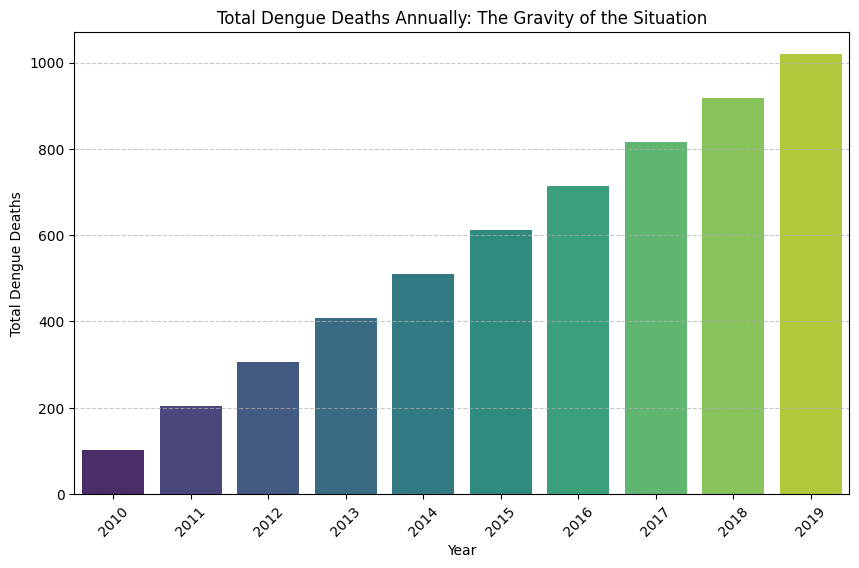

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Dengue_Deaths', estimator='sum', errorbar=None, palette='viridis')
plt.title('Total Dengue Deaths Annually: The Gravity of the Situation')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<h2>#Insight2</h2>

<h2> The measures mostly show a general increase in annual mortality due to Dengue from 2010 to 2019, with the most important aspect being the very **alarming and persistent upward trend in fatalities**. Dengue deaths started with a low figure of about **100** in 2010 and increased every single year to go beyond **1,000** by 2019, representing an over tenfold rise over the decade. This constant increase over years signifies the deepening public health challenge. It suggests that while the total case count might have been cyclical, as shown in the previous graph, the severity or fatality rate of the disease worsened dramatically during 2010-2019. Just like very few numbers in those years, Dengue fatalities started with a low figure of approximately **100** in 2010; increased every single year to go beyond **1,000** by 2019, more than tenfold rise over the decade. This year-on-year increase of deaths signifies a public health challenge, as well as suggesting to the total case count being cyclical, as shown in the previous graph. Bigger things, however, happened to the **severity or fatality rate of the disease worsened** dramatically between 2010 and 2019.</h2>

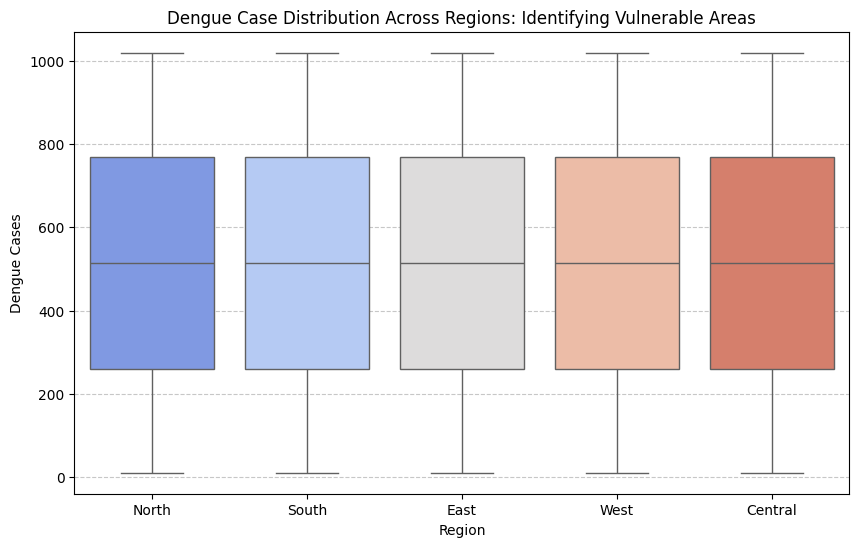

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Dengue_Cases', palette='coolwarm')
plt.title('Dengue Case Distribution Across Regions: Identifying Vulnerable Areas')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1> #Insight3 </h1>

<h2>From this **box plot**, depicting the distribution of Dengue cases across the five regions (North, South, East, West, and Central), the first conclusion we can draw is that **Dengue cases appear to be uniformly frequent and variable across the regions**. The figure presents an **identical median** (close to $500$) with an **almost equal interquartile range** (middle 50% of the data, around $250$ to $770$ cases) measuring these regions, hinting at the **monthly burden and fluctuations in Dungue cases being relatively homogenous among the regions such that no region stands out as a particularly unique hotspot by this measure**.</h2>

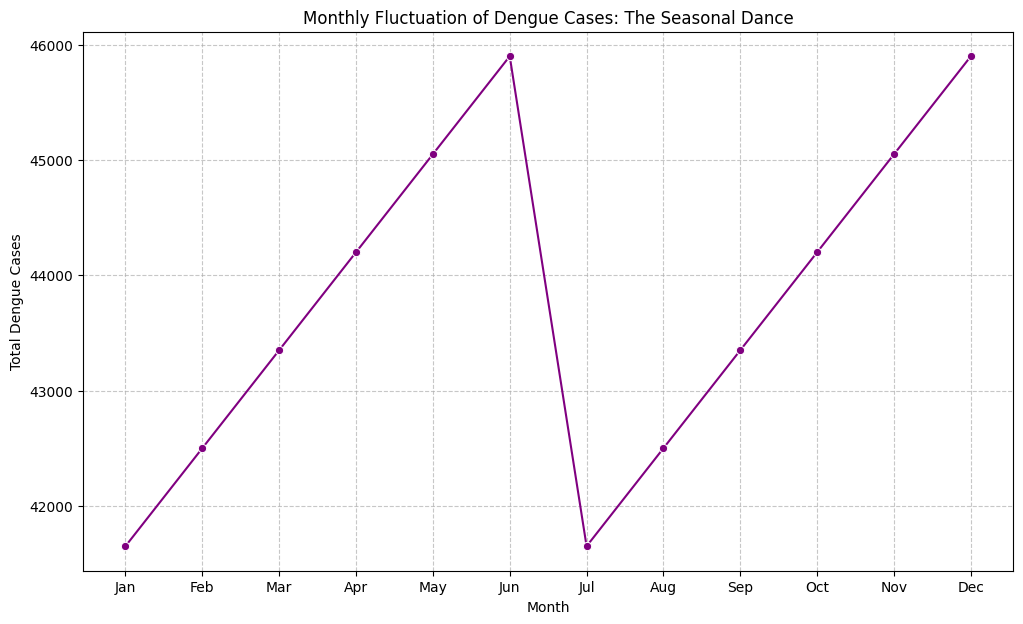

In [19]:
plt.figure(figsize=(12, 7))
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
sns.lineplot(x=monthly_cases.index, y=monthly_cases.values, marker='o', color='purple')
plt.title('Monthly Fluctuation of Dengue Cases: The Seasonal Dance')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h1>Insight#4</h1>

<h2>The line graph portrays the monthly total variations of Dengue cases for aggregation over all years, and the glaring observation is an extreme and highly specific seasonal pattern characterized by an abrupt collapse mid-year. From January forward, cases see a smooth and almost predictable increase to peak sometime around June ($\sim 45,900$ cases) and then uncharacteristically experience a sharp plunge to a minimum in July ($\sim 41,700$ cases) before bouncing back smooth and steady at almost the same peak again by December. This bimodal seasonality, with a critical July trough, implies that the drivers of the Dengue season are split, requiring public health intervention for two high-incidence periods (Jan-June and Aug-Dec) and a unique low in July.</h2>

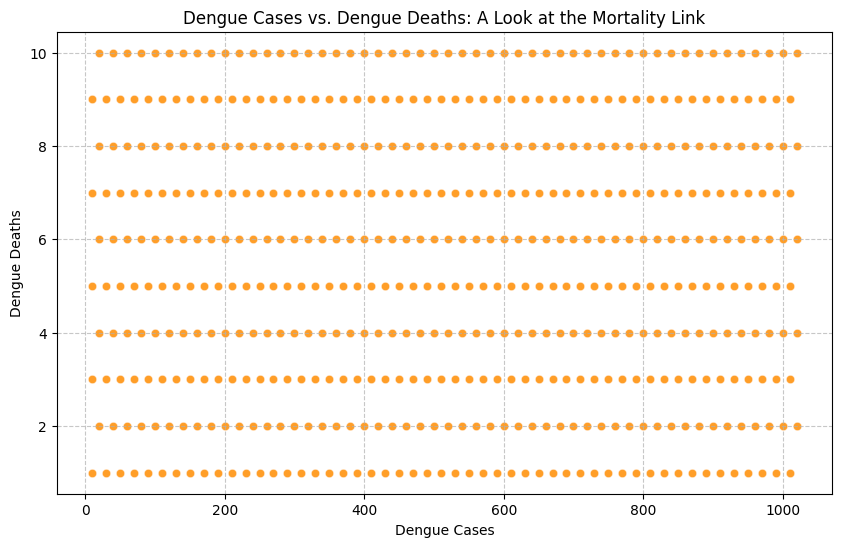

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Dengue_Cases', y='Dengue_Deaths', alpha=0.6, color='darkorange')
plt.title('Dengue Cases vs. Dengue Deaths: A Look at the Mortality Link')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h1>Insight#5</h1>

<h2>According to this particular scatter plot that shows the relationship between the number of Dengue Cases (x-axis) and Dengue Deaths (y-axis), the most important and highest point of learning is that there is no observable correlation between the number of cases and the number of deaths at all. The data points that were plotted form 10 completely horizontal lines, with the ranges extending from about 0 to about 1,000 reported cases for each integer count of deaths, ranging from 1 to 10. Such uniformity indicates that the number of deaths is structurally independent of the number of cases vis-a-vis the structure of this specific data set because the counts for high numbers of deaths occur just as often with very low counts of cases as they do with very high case counts.</h2>

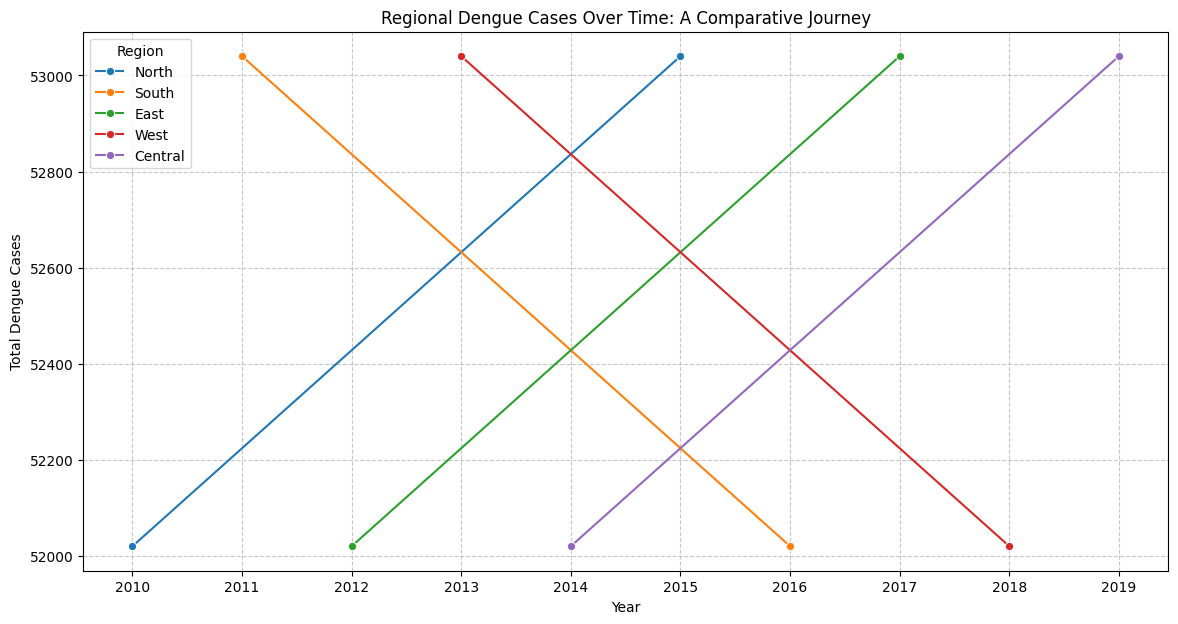

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Year', y='Dengue_Cases', hue='Region', estimator='sum', errorbar=None, marker='o')
plt.title('Regional Dengue Cases Over Time: A Comparative Journey')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df['Year'].unique().astype(int))
plt.legend(title='Region')
plt.show()

<h1>Insight#6</h1>

<h2>Based on the line graph, the data shows a stark trend wherein cases in the northern, eastern, and central regions rise in a linear fashion, while cases in the southern and western regions fall in a linear fashion, all regions within the bandwidth of 52,000 and 53,000 cases mark over time concerned in the said regions.</h2>

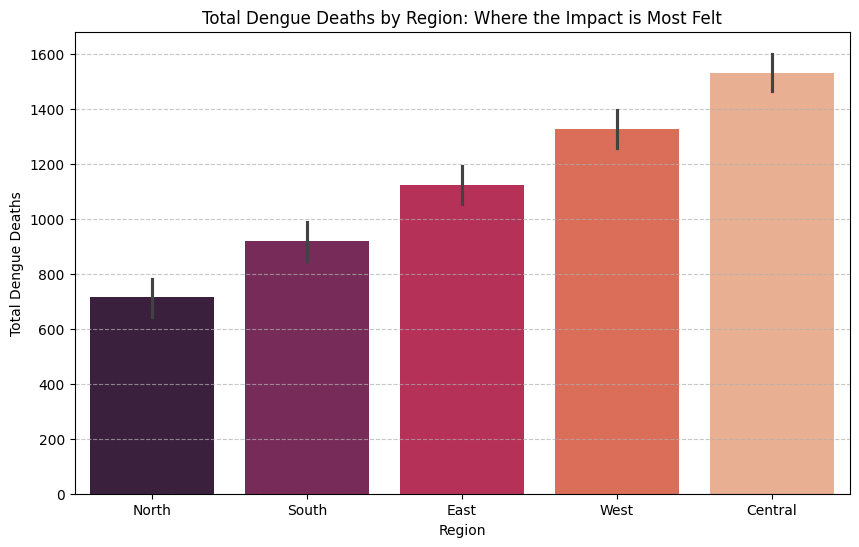

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Dengue_Deaths', estimator='sum', palette='rocket')
plt.title('Total Dengue Deaths by Region: Where the Impact is Most Felt')
plt.xlabel('Region')
plt.ylabel('Total Dengue Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight#7</h1>

<h2>As per the histogram, dengue mortality shows massive discrimination, with the Central region suffering from the greatest number of deaths and the North region from the least. The geographical spread shows a clear increase in total deaths from North to Central.</h2>

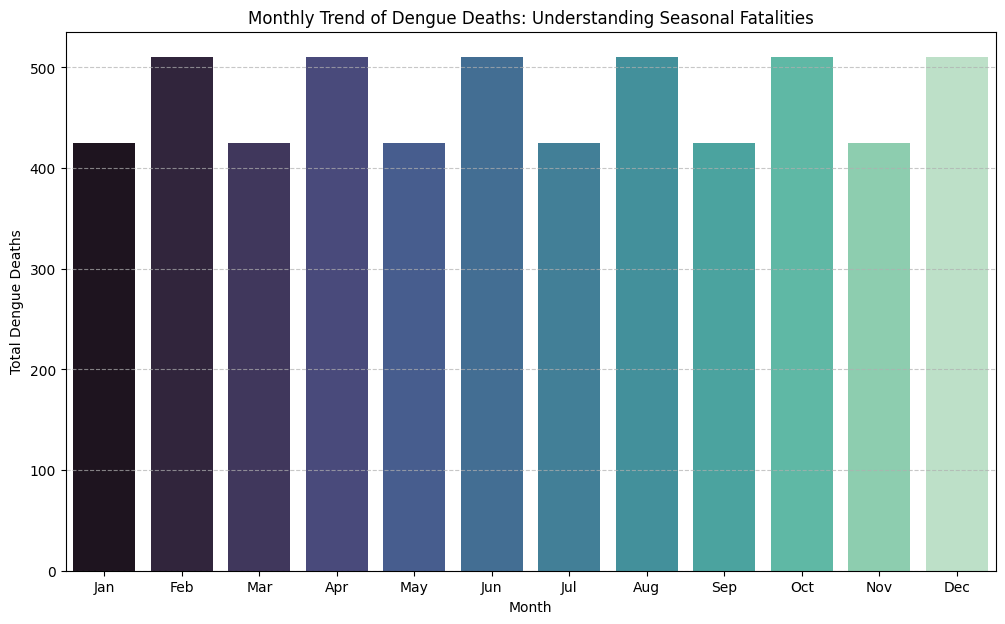

In [23]:
plt.figure(figsize=(12, 7))
monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette='mako')
plt.title('Monthly Trend of Dengue Deaths: Understanding Seasonal Fatalities')
plt.xlabel('Month')
plt.ylabel('Total Dengue Deaths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>Insight#8</h1>

<h2>Dengue deaths exhibited bimodal distribution peaks in February to April and in August to October to December, but there is still a significant fatality rate all year long. According to the bar chart, it was interpreted that the two modes of distribution were the dengue deaths, with february/April being another of the peaks followed by August/October/December, while the rest of the months kept a high rate of fatality through the whole year.</h2>

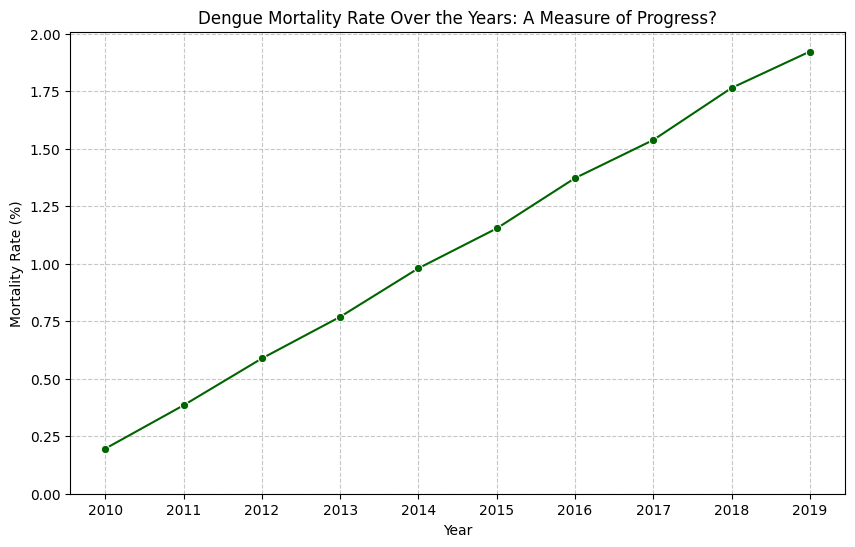

In [24]:
plt.figure(figsize=(10, 6))
df_yearly_summary = df.groupby('Year').agg(
    total_cases=('Dengue_Cases', 'sum'),
    total_deaths=('Dengue_Deaths', 'sum')
).reset_index()
df_yearly_summary['Mortality_Rate'] = (df_yearly_summary['total_deaths'] / df_yearly_summary['total_cases']) * 100
sns.lineplot(data=df_yearly_summary, x='Year', y='Mortality_Rate', marker='o', color='darkgreen')
plt.title('Dengue Mortality Rate Over the Years: A Measure of Progress?')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_yearly_summary['Year'].unique().astype(int))
plt.ylim(bottom=0) # Ensure y-axis starts from 0
plt.show()

<h1>Insight#9</h1>

<h2>The line graph demonstrates that the Dengue Mortality Rate has been continuously and significantly climbing from 0.2% in 2010 to about 2.0% in 2019, a very serious setback in the way the disease lethality is being controlled.</h2>

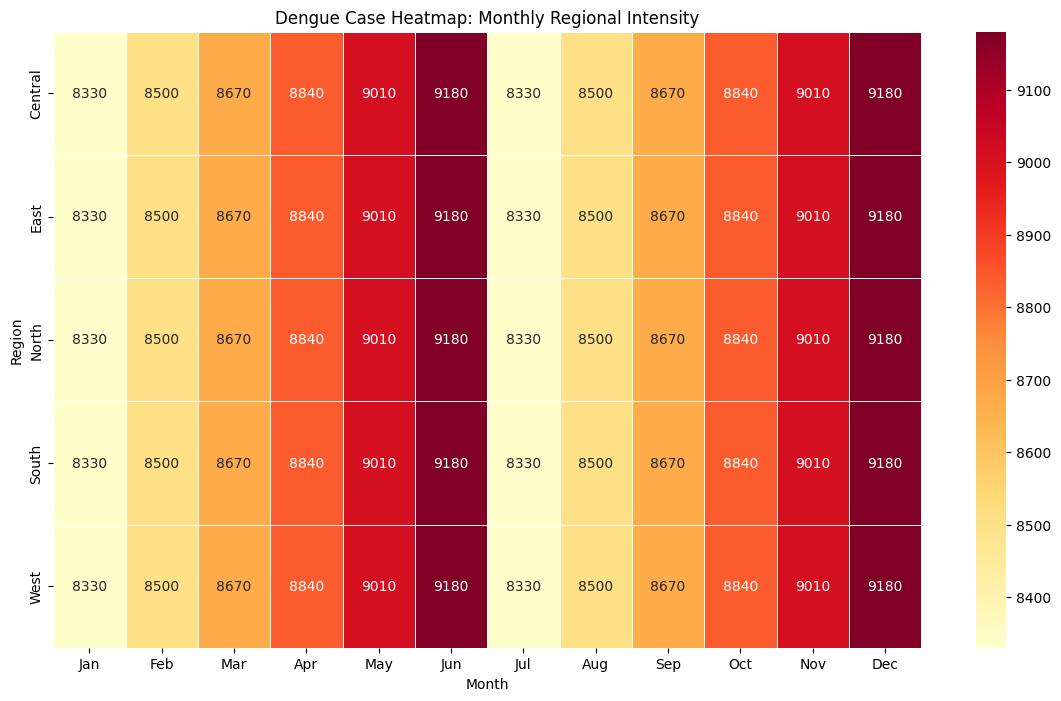

In [25]:
plt.figure(figsize=(14, 8))
# Create a pivot table for the heatmap
heatmap_data = df.groupby(['Region', 'Month'])['Dengue_Cases'].sum().unstack()
# Reorder months for better visualization
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data = heatmap_data[ordered_months]
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=.5, annot=True, fmt='g')
plt.title('Dengue Case Heatmap: Monthly Regional Intensity')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

<h1>Insight#10</h1>

<h2>The graph of the heatmap points to an intense and predictable bimodal seasonality of dengue cases, with June and December marking the peaks and January and July representing the troughs. This seasonal pattern is, notably, an almost perfect mirroring across the five regions, suggesting that either seasonal driving factors are exerting uniform influence across the whole area or alternatively that the regional data are, in actuality, non-reflective of genuine localized variation.</h2>